# MET DATA ANALYSIS
#### Reid Holben and Gabriel Barela

#### Loading the dataset from GitHub using pandas.
* Imports the pandas library: 
    * This is essential for data manipulation and analysis in Python.
* Defines the URL: 
    * This is the link to the raw dataset hosted on GitHub.
* Loads the dataset: 
    * The pd.read_csv(url) function reads the CSV file from the provided URL and loads it into a pandas DataFrame called data.

In [1]:
# ! pip install -r requirements.txt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# URL of the raw dataset on GitHub
url = 'https://github.com/metmuseum/openaccess/raw/refs/heads/master/MetObjects.csv'

# Load the dataset
data = pd.read_csv(url)

#Data Descriptive Statistics - Very little in way of numerical columns
#Metadata information from the Met is lacking, last update was June 17th 2023 but there is little else to go off of
print(data.describe())

C:\Users\gbare\AppData\Local\Temp\ipykernel_18344\3371701879.py:5: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


           Object ID  Object Begin Date  Object End Date  Metadata Date
count  484956.000000      484956.000000    484956.000000            0.0
mean   394499.940353        1303.913734      1402.978142            NaN
std    242732.561637        1710.259182      1132.101347            NaN
min         1.000000     -400000.000000   -240000.000000            NaN
25%    212379.750000        1535.000000      1593.000000            NaN
50%    374771.500000        1800.000000      1840.000000            NaN
75%    570971.250000        1891.000000      1905.000000            NaN
max    900748.000000        5000.000000      2870.000000            NaN


In [3]:
data.shape

(484956, 54)

#### Analyze missing data in the DataFrame and combine it with the data types of each feature.
1. Calculate Missing Data:
* nullCounts = data.isnull().sum(): Counts the number of missing values for each feature.
* totalInstances = len(data): Gets the total number of instances in the DataFrame.
* nullPercentages = (nullCounts / totalInstances) * 100: Calculates the percentage of missing values for each feature.
2. Create a List of Tuples:
* A loop iterates over the features, counts, and percentages, appending them to nullData as tuples.
3. Create a DataFrame for Missing Data:
* nullDataFrame = pd.DataFrame(nullData, columns=['Feature', 'Count', 'Percentage']): Converts the list of tuples into a DataFrame.
* nullDataFrame = nullDataFrame.sort_values(by='Percentage', ascending=False): Sorts the DataFrame by the percentage of missing values in descending order.
4. Get Data Types:
* data_types = data.dtypes: Gets the data types of each feature.
* data_types_df = data_types.reset_index(): Converts the Series to a DataFrame.
* data_types_df.columns = ['Feature', 'Data Type']: Renames the columns for readability.
5. Merge DataFrames:
* combined_df = pd.merge(nullDataFrame, data_types_df, on='Feature'): Merges the missing data DataFrame with the data types DataFrame on the 'Feature' column.
* Finally, combined_df will contain the features, their missing value counts, percentages, and data types.

In [4]:
nullData = []
nullCounts = data.isnull().sum()
totalInstances = len(data)
nullPercentages = (nullCounts / totalInstances) * 100

for feature, count, percentage in zip(nullCounts.index, nullCounts, nullPercentages):
    nullData.append((feature, count, round(percentage, 2)))

nullDataFrame = pd.DataFrame(nullData, columns=['Feature', 'Count', 'Percentage'])

# Sort the DataFrame by 'Percentage' in decending order
nullDataFrame = nullDataFrame.sort_values(by='Percentage', ascending=False)

# Get the data types of each feature in the DataFrame
data_types = data.dtypes

# Convert the data types to a DataFrame for better readability
data_types_df = data_types.reset_index()
data_types_df.columns = ['Feature', 'Data Type']

# Merge the null data and data types into a single DataFrame
combined_df = pd.merge(nullDataFrame, data_types_df, on='Feature')

combined_df

,Feature,Count,Percentage,Data Type
0,Metadata Date,484956,100.00,float64
1,River,482864,99.57,object
2,State,482335,99.46,object
3,Locus,477438,98.45,object
4,County,476397,98.24,object
5,Reign,473720,97.68,object
6,Locale,469217,96.75,object
7,Excavation,468385,96.58,object
8,Subregion,462813,95.43,object
9,Dynasty,461755,95.22,object


In [5]:
combined_df.shape

(54, 4)

#### Code set up to keep only the features relevant for analyzing accession and object dates.
1. Define Features to Keep:
* features_to_keep = ['AccessionYear', 'Object Begin Date', 'Object End Date', 'Department', 'Artist Begin Date', 'Artist End Date', 'Dimensions','Object Date']: 
    * Specifies the columns you want to retain for your analysis.
2. Drop Irrelevant Features:
* cleaned_data = data[features_to_keep]: 
    * Creates a new DataFrame cleaned_data that includes only the specified columns.
3. Convert 'AccessionYear' to Numeric:
* cleaned_data.loc[:, 'AccessionYear'] = pd.to_numeric(cleaned_data['AccessionYear'], errors='coerce'): 
    * Converts the 'AccessionYear' column to numeric, coercing any errors to NaN.
4. Drop Rows with NaN Values in 'AccessionYear':
* cleaned_data = cleaned_data.dropna(subset=['AccessionYear']): 
    * Drops rows where 'AccessionYear' is NaN.
5. Display the First Few Rows:
* .head(): 
    * Displays the first five rows of the cleaned_data DataFrame.

In [6]:
# Filter rows where 'AccessionYear' is NaN
nan_rows = data[data['AccessionYear'].isna()]

# Print the filtered rows
print(nan_rows)

                  Object Number  Is Highlight  Is Timeline Work  \
123                 Inst.68.4.1         False             False   
130                 Inst.69.8.1         False             False   
131                 Inst.69.8.2         False             False   
238                  Inst.X.6.1         False             False   
392                 Inst.1983.2         False             False   
...                         ...           ...               ...   
484569                   X.3.18         False             False   
484675                   X.38.2         False             False   
484752    N7433.4.R678 Q52 1994         False             False   
484872  NE2296 .S74 1901 Quarto         False             False   
484954                170.1 C42          True             False   

        Is Public Domain  Object ID Gallery Number           Department  \
123                False        132            738    The American Wing   
130                False        141          

In [7]:
data.shape

(484956, 54)

In [8]:
# Alternatively, you can use dropna for NaN values and filter for empty strings and zeros
data = data.dropna(subset=['AccessionYear'])
data = data[(data['AccessionYear'] != '') & (data['AccessionYear'] != 0)]
data.shape

(481094, 54)

In [9]:
# Filter rows where 'AccessionYear' is NaN
nan_rows = data[data['AccessionYear'].isna()]

# Print the filtered rows
print(nan_rows)

Empty DataFrame
Columns: [Object Number, Is Highlight, Is Timeline Work, Is Public Domain, Object ID, Gallery Number, Department, AccessionYear, Object Name, Title, Culture, Period, Dynasty, Reign, Portfolio, Constituent ID, Artist Role, Artist Prefix, Artist Display Name, Artist Display Bio, Artist Suffix, Artist Alpha Sort, Artist Nationality, Artist Begin Date, Artist End Date, Artist Gender, Artist ULAN URL, Artist Wikidata URL, Object Date, Object Begin Date, Object End Date, Medium, Dimensions, Credit Line, Geography Type, City, State, County, Country, Region, Subregion, Locale, Locus, Excavation, River, Classification, Rights and Reproduction, Link Resource, Object Wikidata URL, Metadata Date, Repository, Tags, Tags AAT URL, Tags Wikidata URL]
Index: []

[0 rows x 54 columns]


In [10]:
# Filter rows where 'AccessionYear' is 0
zero_rows = data[data['AccessionYear'] == 0]

# Print the filtered rows with 0 values
print("Rows with 0 values in 'AccessionYear':")
print(zero_rows)

Rows with 0 values in 'AccessionYear':
Empty DataFrame
Columns: [Object Number, Is Highlight, Is Timeline Work, Is Public Domain, Object ID, Gallery Number, Department, AccessionYear, Object Name, Title, Culture, Period, Dynasty, Reign, Portfolio, Constituent ID, Artist Role, Artist Prefix, Artist Display Name, Artist Display Bio, Artist Suffix, Artist Alpha Sort, Artist Nationality, Artist Begin Date, Artist End Date, Artist Gender, Artist ULAN URL, Artist Wikidata URL, Object Date, Object Begin Date, Object End Date, Medium, Dimensions, Credit Line, Geography Type, City, State, County, Country, Region, Subregion, Locale, Locus, Excavation, River, Classification, Rights and Reproduction, Link Resource, Object Wikidata URL, Metadata Date, Repository, Tags, Tags AAT URL, Tags Wikidata URL]
Index: []

[0 rows x 54 columns]


In [11]:
# List of features to keep for analysis of accession and object dates
features_to_keep = ['AccessionYear', 'Object Begin Date', 'Object End Date', 'Department', 'Artist Begin Date', 'Artist End Date', 'Dimensions','Object Date']

# Drop irrelevant features
cleaned_data = data[features_to_keep]

# Convert 'AccessionYear' to numeric, coercing errors to NaN
cleaned_data.loc[:, 'AccessionYear'] = pd.to_numeric(cleaned_data['AccessionYear'], errors='coerce')

cleaned_data.head()

,AccessionYear,Object Begin Date,Object End Date,Department,Artist Begin Date,Artist End Date,Dimensions,Object Date
0,1979.0,1853,1853,The American Wing,1794,1869,Dimensions unavailable,1853
1,1980.0,1901,1901,The American Wing,1785,1844,Dimensions unavailable,1901
2,1967.0,1909,1927,The American Wing,NaN,NaN,Diam. 11/16 in. (1.7 cm),1909–27
3,1967.0,1909,1927,The American Wing,NaN,NaN,Diam. 11/16 in. (1.7 cm),1909–27
4,1967.0,1909,1927,The American Wing,NaN,NaN,Diam. 11/16 in. (1.7 cm),1909–27


In [12]:
# Filter rows where 'AccessionYear' is NaN
nan_rows = cleaned_data[cleaned_data['AccessionYear'].isna()]

# Print the filtered rows
nan_rows.shape

(40, 8)

In [13]:
# Filter rows where 'AccessionYear' is NaN
zero_rows = cleaned_data[cleaned_data['AccessionYear']==0]

# Print the filtered rows
zero_rows.shape

(0, 8)

In [14]:
cleaned_data = cleaned_data.dropna(subset=['AccessionYear'])

In [15]:
# Filter rows where 'AccessionYear' is NaN
nan_rows = cleaned_data[cleaned_data['AccessionYear'].isna()]

# Print the filtered rows
print(nan_rows)

Empty DataFrame
Columns: [AccessionYear, Object Begin Date, Object End Date, Department, Artist Begin Date, Artist End Date, Dimensions, Object Date]
Index: []


In [16]:
data.shape

(481094, 54)

In [17]:
cleaned_data.shape

(481054, 8)

## Plotting the Distribution of Accession Dates by Department

To visualize the distribution of accession dates across different departments.

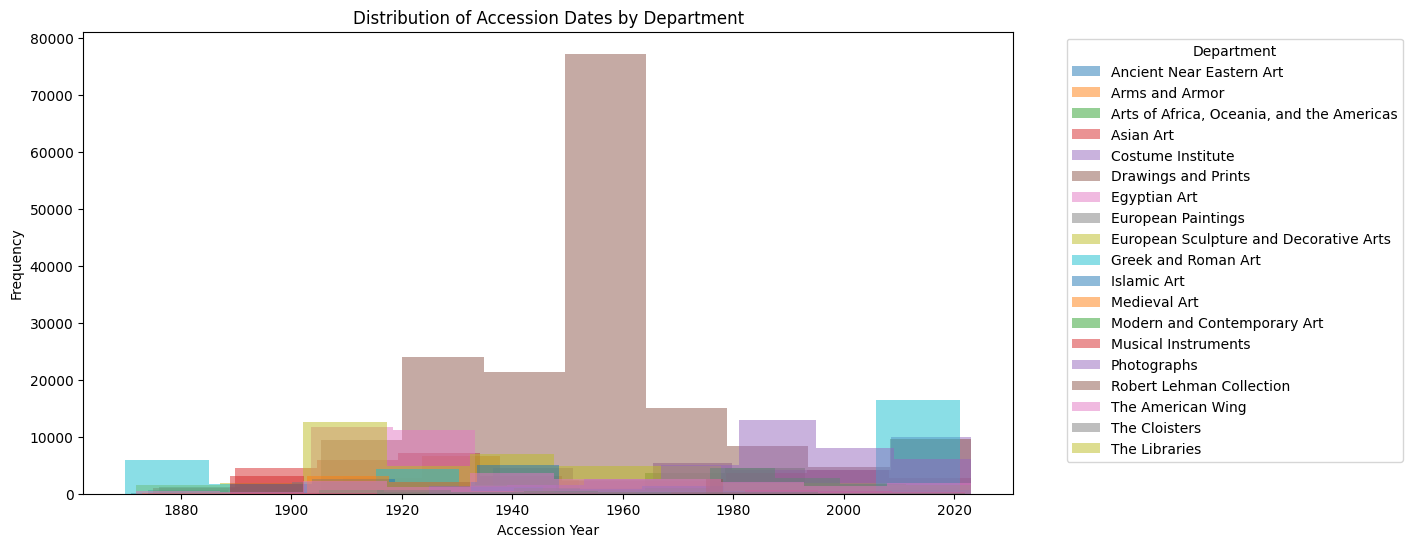

In [18]:
# Create a Figure
plt.figure(figsize=(12, 6))

# Group and Plot Data
cleaned_data.groupby('Department')['AccessionYear'].plot(kind='hist', alpha=0.5, legend=True)

# Add Titles and Labels
plt.title('Distribution of Accession Dates by Department')
plt.xlabel('Accession Year')
plt.ylabel('Frequency')

# Add a Legend
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the Plot
plt.show()

## Plotting the Distribution of Object Begin Dates by Department

To visualize the distribution of object begin dates across different departments.

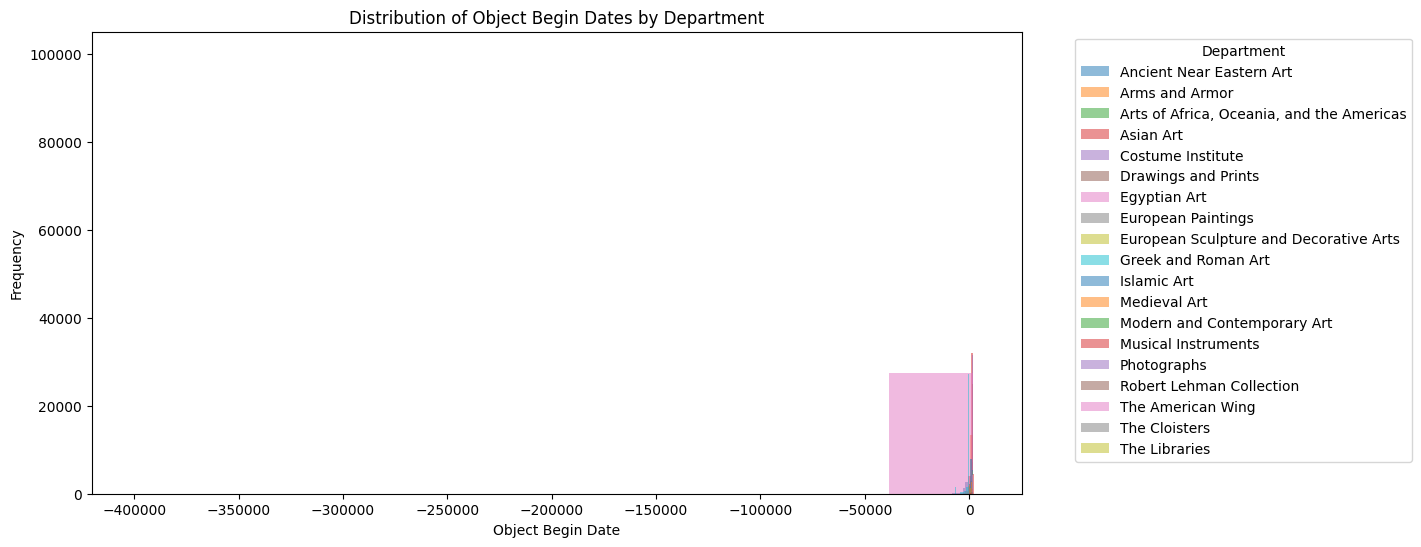

In [19]:
# Plot the distribution of object begin dates by department
plt.figure(figsize=(12, 6))
cleaned_data.groupby('Department')['Object Begin Date'].plot(kind='hist', alpha=0.5, legend=True)

# Add Titles and Labels
plt.title('Distribution of Object Begin Dates by Department')
plt.xlabel('Object Begin Date')
plt.ylabel('Frequency')

# Add a Legend
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the Plot
plt.show()

## Plotting the Distribution of Object End Dates by Department

To visualize the distribution of object end dates across different departments.

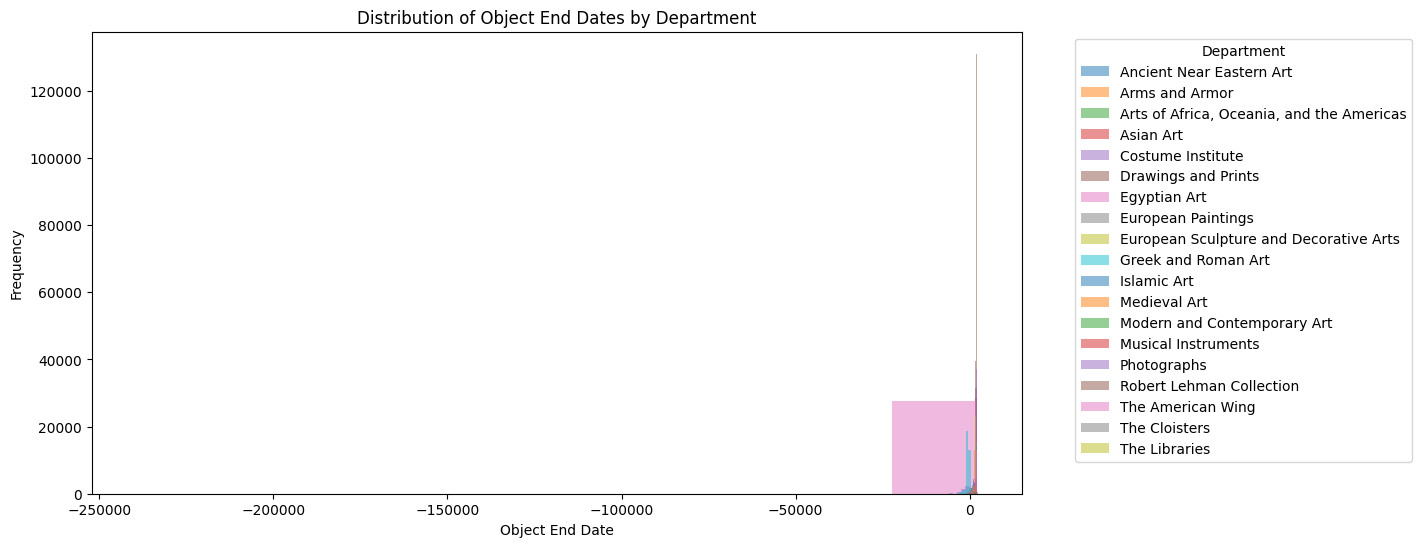

In [20]:
# Plot the distribution of object end dates by department
plt.figure(figsize=(12, 6))
cleaned_data.groupby('Department')['Object End Date'].plot(kind='hist', alpha=0.5, legend=True)

# Add Titles and Labels
plt.title('Distribution of Object End Dates by Department')
plt.xlabel('Object End Date')
plt.ylabel('Frequency')

# Add a Legend
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the Plot
plt.show()

## Extracting and Integrating Artist Information

To extract and integrate artist information, including artist dates and dimensions of the art objects, we can use the following steps:

In [21]:
# # Optionally: Extract and integrate artist information such as artist dates and dimensions of the art objects
# artist_info = cleaned_data[['Artist Begin Date', 'Artist End Date', 'Dimensions']].dropna()

# # Display the first few rows of the artist information
# artist_info.head()

#### Code that shows the rows that are considered anomalies, with the 'Anomaly' column indicating -1 for anomalies.
* Anomalies are data points that significantly differ from the majority of the data. In the context of your dataset, anomalies might be identified due to unusual or unexpected values in one or more features. 
    * Here are some possible reasons why certain rows were flagged as anomalies:
        * Extreme Values: 
            * Data points with values that are extremely high or low compared to the rest of the dataset. For example, an 'Object Date' far outside the typical range.

        * Inconsistent Data: 
            * Rows with inconsistent or contradictory information. For instance, an 'Object Begin Date' that is later than the 'Object End Date'.
        * Rare Combinations: 
            * Uncommon combinations of features that do not appear frequently in the dataset. For example, a specific 'Department' with unusual 'AccessionYear' values.
        * Missing or Default Values: 
            * Rows that have many missing values or default values (e.g., 0 or NaN) in features that usually contain meaningful data.
* To better understand why specific rows were flagged as anomalies, we can examine the values in these rows and compare them to the rest of the dataset. This can help identify patterns or characteristics that make these rows stand out.

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import re

# # Clean 'Object Begin Date" column by extracting the first numeric value
# cleaned_data['Object Date'] = cleaned_data['Object Date'].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else None)

# # Convert 'Object Date' to numeric, coercing errors to NaN
# cleaned_data['Object Date'] = pd.to_numeric(cleaned_data['Object Date'], errors='coerce')


# Save version pre one hot encoding
cleaned_data_no_one = cleaned_data.copy()

# Convert categorical data to numerical data using one-hot encoding
cleaned_data = pd.get_dummies(cleaned_data, columns=['Department'])

# # Fill NaN values with 0 for simplicity
# cleaned_data = cleaned_data.fillna(0)

# Ensure all columns are numeric
for column in cleaned_data.columns:
    cleaned_data[column] = pd.to_numeric(cleaned_data[column], errors='coerce')

# # Drop rows with any remaining NaN values
# cleaned_data = cleaned_data.dropna()

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.01, random_state=42)

# Fit the model to the data
model.fit(cleaned_data)

# Predict anomalies (1 for normal, -1 for anomaly)
anomalies = model.predict(cleaned_data)

# Add the anomaly column to the DataFrame
cleaned_data['Anomaly'] = anomalies

# Display the rows that are considered anomalies
anomalies_df = cleaned_data[cleaned_data['Anomaly'] == -1]

# Print the anomalies DataFrame
print(anomalies_df)

        AccessionYear  Object Begin Date  Object End Date  Artist Begin Date  \
17585          1912.0             -12500             -300                NaN   
17586          1912.0             -12500             -300                NaN   
20953          1908.0             -10025            -4975                NaN   
20954          1908.0              -5000            -2000                NaN   
20956          1908.0              -5000            -2000                NaN   
...               ...                ...              ...                ...   
419180         1908.0             -10025            -4975                NaN   
419181         1908.0             -10025            -4975                NaN   
419182         1908.0             -10025            -4975                NaN   
419202         1908.0             -10025            -4975                NaN   
457385         1874.0              -7000              330                NaN   

        Artist End Date  Dimensions  Ob

## Counting and Printing the Number of Anomalies

To count and print the number of anomalies detected by the Isolation Forest model, we can use the following steps:

In [23]:
# Count the number of anomalies
anomaly_count = cleaned_data['Anomaly'].value_counts()

# Print the count of anomalies
print(anomaly_count)

Anomaly
 1    476331
-1      4723
Name: count, dtype: int64


## Plotting the Count of Anomalies

To visualize the count of anomalies detected by the Isolation Forest model, we can use the following steps:

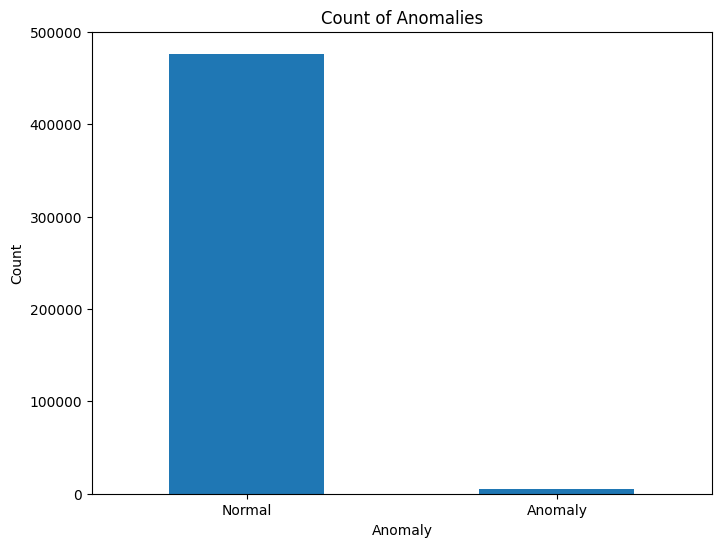

In [24]:
# Plot the count of anomalies
plt.figure(figsize=(8, 6))
anomaly_count.plot(kind='bar')

# Add Titles and Labels
plt.title('Count of Anomalies')
plt.xlabel('Anomaly')
plt.ylabel('Count')

# Customize X-axis Labels
plt.xticks(ticks=[0, 1], labels=['Normal', 'Anomaly'], rotation=0)

# Display the Plot
plt.show()

## Plotting Anomalies in a Scatter Plot with Different Colors

To visualize anomalies in a scatter plot with different colors, we can use the following steps:

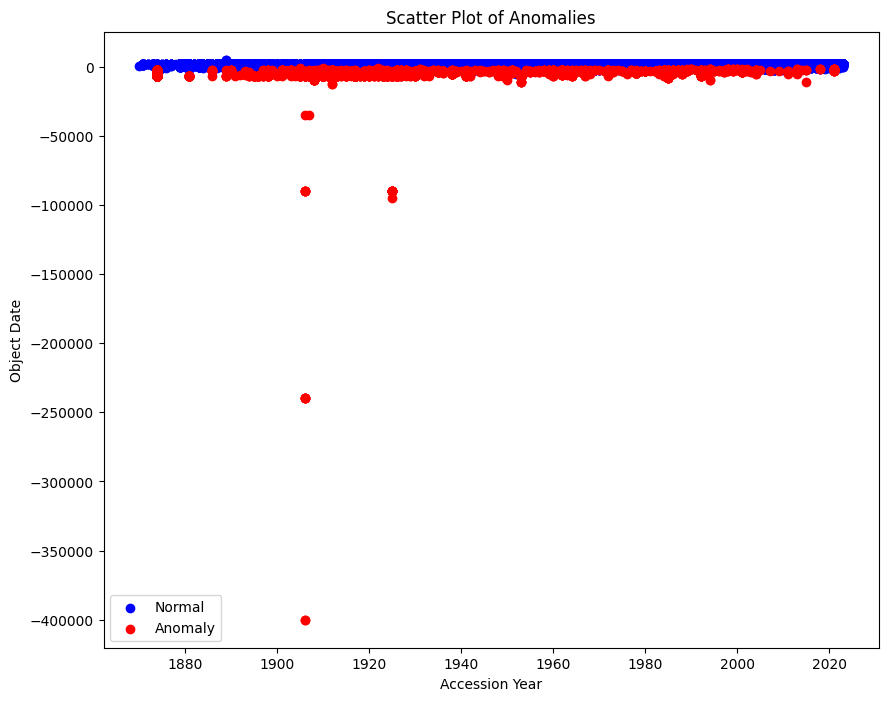

In [25]:
# Plot anomalies in a scatter plot with different colors
plt.figure(figsize=(10, 8))

# Plot normal data points
plt.scatter(cleaned_data[cleaned_data['Anomaly'] == 1]['AccessionYear'],
            cleaned_data[cleaned_data['Anomaly'] == 1]['Object Begin Date'],
            c='blue', label='Normal')

# Plot anomalous data points
plt.scatter(cleaned_data[cleaned_data['Anomaly'] == -1]['AccessionYear'],
            cleaned_data[cleaned_data['Anomaly'] == -1]['Object Begin Date'],
            c='red', label='Anomaly')

plt.title('Scatter Plot of Anomalies')
plt.xlabel('Accession Year')
plt.ylabel('Object Date')
plt.legend()
plt.show()

# Removing Anomalies and Plotting the New Graph

This script removes anomalies from the dataset and plots a scatter plot without these anomalies. The following steps outline the process:

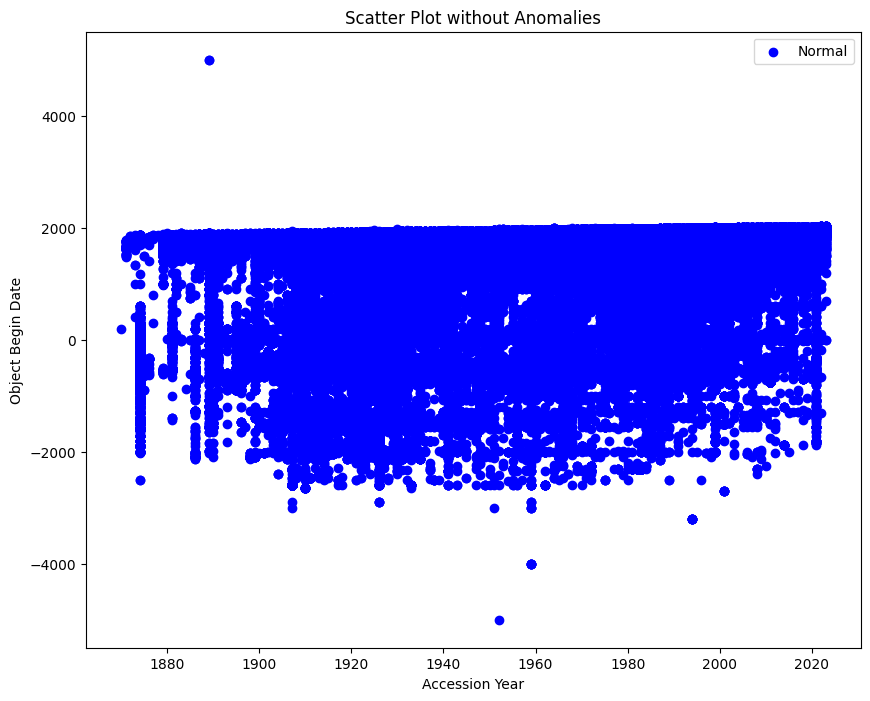

In [26]:
# Remove anomalies from the dataset
cleaned_data_no_anomalies = cleaned_data[cleaned_data['Anomaly'] == 1]

# Plot the new graph without anomalies
plt.figure(figsize=(10, 8))

# Plot normal data points without anomalies
plt.scatter(cleaned_data_no_anomalies['AccessionYear'],
            cleaned_data_no_anomalies['Object Begin Date'],
            c='blue', label='Normal')

plt.title('Scatter Plot without Anomalies')
plt.xlabel('Accession Year')
plt.ylabel('Object Begin Date')
plt.legend()
plt.show()

In [27]:
# Filter rows where 'AccessionYear' is NaN
outlier_rows_positive = cleaned_data[cleaned_data['Object Begin Date']>=2025]
print(outlier_rows_positive)

        AccessionYear  Object Begin Date  Object End Date  Artist Begin Date  \
336740         1889.0               5000                1                NaN   
336969         1889.0               5000                0                NaN   

        Artist End Date  Dimensions  Object Date  Anomaly  
336740              NaN         NaN          NaN        1  
336969              NaN         NaN          NaN        1  


In [28]:
outlier_rows_positive.shape

(2, 8)

In [29]:
# Filter rows where 'AccessionYear' is NaN
outlier_rows_negative = cleaned_data[cleaned_data['Object Begin Date']<=-6000]
print(outlier_rows_negative)

        AccessionYear  Object Begin Date  Object End Date  Artist Begin Date  \
17585          1912.0             -12500             -300                NaN   
17586          1912.0             -12500             -300                NaN   
20953          1908.0             -10025            -4975                NaN   
38247          1994.0             -10000             1644                NaN   
38250          1994.0             -10000             1644                NaN   
...               ...                ...              ...                ...   
419180         1908.0             -10025            -4975                NaN   
419181         1908.0             -10025            -4975                NaN   
419182         1908.0             -10025            -4975                NaN   
419202         1908.0             -10025            -4975                NaN   
457385         1874.0              -7000              330                NaN   

        Artist End Date  Dimensions  Ob

In [30]:
outlier_rows_negative.shape

(1689, 8)

In [31]:
cleaned_data = cleaned_data[cleaned_data['Object Begin Date'] <= 2025]
cleaned_data = cleaned_data[cleaned_data['Object Begin Date'] >= -5000]

In [32]:
cleaned_data.shape

(479332, 8)

In [33]:
# Filter rows where 'AccessionYear' is NaN
outlier_rows_positive = cleaned_data[cleaned_data['Object Begin Date']>=2025]
print(outlier_rows_positive)

Empty DataFrame
Columns: [AccessionYear, Object Begin Date, Object End Date, Artist Begin Date, Artist End Date, Dimensions, Object Date, Anomaly]
Index: []


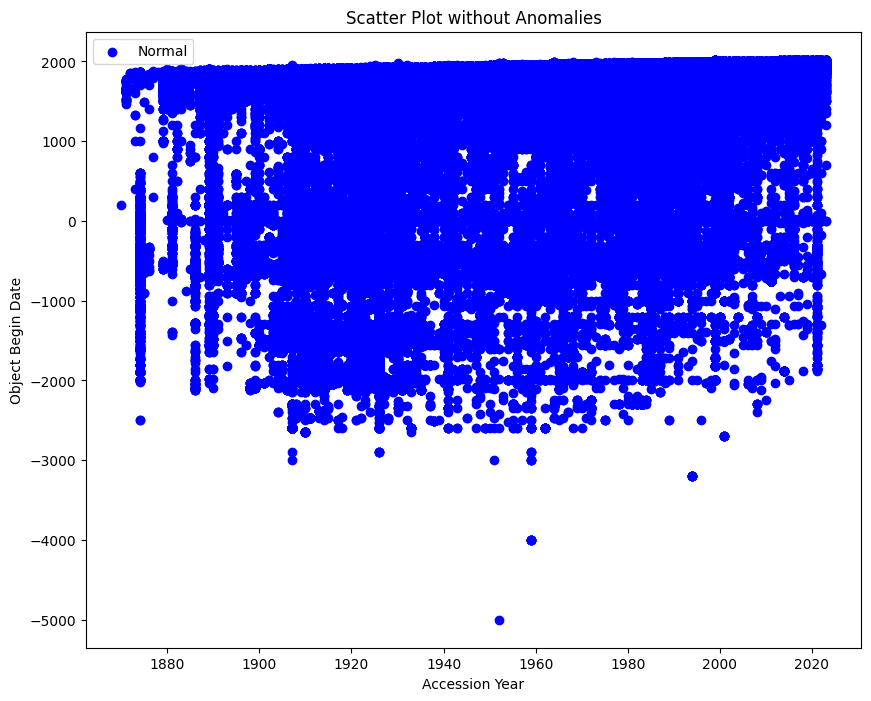

In [34]:
# Remove anomalies from the dataset
cleaned_data_no_anomalies = cleaned_data[cleaned_data['Anomaly'] == 1]

# Plot the new graph without anomalies
plt.figure(figsize=(10, 8))

# Plot normal data points without anomalies
plt.scatter(cleaned_data_no_anomalies['AccessionYear'],
            cleaned_data_no_anomalies['Object Begin Date'],
            c='blue', label='Normal')

plt.title('Scatter Plot without Anomalies')
plt.xlabel('Accession Year')
plt.ylabel('Object Begin Date')
plt.legend()
plt.show()

# Reversing One-Hot Encoding for the 'Department' Column

This script reverses the one-hot encoding for the 'Department' column and drops the one-hot encoded columns. The following steps outline the process:

In [35]:
# Identify one-hot encoded columns
department_columns = [col for col in cleaned_data_no_anomalies.columns if col.startswith('Department_')]

# Check if department_columns is not empty
if department_columns:
    # Reverse one-hot encoding for the 'Department' column
    cleaned_data_no_anomalies.loc[:, 'Department'] = cleaned_data_no_anomalies[department_columns].idxmax(axis=1)
    cleaned_data_no_anomalies.loc[:, 'Department'] = cleaned_data_no_anomalies['Department'].apply(lambda x: x.split('_')[1])

    # Drop the one-hot encoded columns
    cleaned_data_no_anomalies = cleaned_data_no_anomalies.drop(columns=department_columns)
else:
    print("No one-hot encoded columns found for 'Department_'")

# Print the first few rows of the DataFrame to verify the changes
print(cleaned_data_no_anomalies.head())

No one-hot encoded columns found for 'Department_'
   AccessionYear  Object Begin Date  Object End Date  Artist Begin Date  \
0         1979.0               1853             1853             1794.0   
1         1980.0               1901             1901             1785.0   
2         1967.0               1909             1927                NaN   
3         1967.0               1909             1927                NaN   
4         1967.0               1909             1927                NaN   

   Artist End Date  Dimensions  Object Date  Anomaly  
0           1869.0         NaN       1853.0        1  
1           1844.0         NaN       1901.0        1  
2              NaN         NaN          NaN        1  
3              NaN         NaN          NaN        1  
4              NaN         NaN          NaN        1  


## Plotting Object Start Dates by Department with Color Indicating Accession Year

To visualize object start dates by department, with color indicating the accession year, we can use the following steps:

In [36]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a scatter plot
# X-axis: Object Begin Date
# Y-axis: Department
# Color: Accession Year (rounded to the nearest decade)
# Colormap: viridis
plt.scatter(cleaned_data_no_anomalies['Object Begin Date'], cleaned_data_no_anomalies['Department'],
            c=round(cleaned_data_no_anomalies['AccessionYear'], -1), cmap='viridis')

# Add a colorbar to the plot
cbar = plt.colorbar()
cbar.set_label('Accession Year')  # Label for the colorbar

# Add a title to the plot
plt.title('Object Start Dates by Department')

# Label the Y-axis
plt.ylabel('Departments')

# Label the X-axis
plt.xlabel('Object Start Dates')

# Display the plot
plt.show()

KeyError: 'Department'

<Figure size 1200x600 with 0 Axes>

# Converting 'AccessionYear' to Numeric and Plotting Distribution by Department

This script converts the 'AccessionYear' column to numeric, handles any errors by coercing them to NaN, drops rows with NaN values, and plots the distribution of accession dates by department. The following steps outline the process:

In [ ]:
# Convert 'AccessionYear' to numeric, coercing errors to NaN
cleaned_data_no_anomalies.loc[:, 'AccessionYear'] = pd.to_numeric(cleaned_data_no_anomalies['AccessionYear'], errors='coerce')

# Drop rows with NaN values in 'AccessionYear'
cleaned_data_no_anomalies = cleaned_data_no_anomalies.dropna(subset=['AccessionYear'])

# Plot the distribution of accession dates by department
plt.figure(figsize=(12, 6))

# Group by 'Department' and plot the distribution of 'AccessionYear'
cleaned_data_no_anomalies.groupby('Department')['AccessionYear'].plot(kind='hist', alpha=0.5, legend=True)

# Add a title to the plot
plt.title('Distribution of Accession Dates by Department')

# Label the X-axis
plt.xlabel('Accession Year')

# Label the Y-axis
plt.ylabel('Frequency')

# Add a legend with the title 'Department'
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

# Plotting the Distribution of Object Dates by Department

This script plots the distribution of object begin and end dates by department. The following steps outline the process:

In [ ]:
# Plot the distribution of object begin dates by department
plt.figure(figsize=(12, 6))

# Group by 'Department' and plot the distribution of 'Object Begin Date'
cleaned_data_no_anomalies.groupby('Department')['Object Begin Date'].plot(kind='hist', alpha=0.5, legend=True)

# Add a title to the plot
plt.title('Distribution of Object Begin Dates by Department')

# Label the X-axis
plt.xlabel('Object Begin Date')

# Label the Y-axis
plt.ylabel('Frequency')

# Add a legend with the title 'Department' and position it outside the plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

# Plotting the Distribution of Object End Dates by Department

This script plots the distribution of object end dates by department. The following steps outline the process:

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Group by 'Department' and plot the distribution of 'Object End Date'
cleaned_data_no_anomalies.groupby('Department')['Object End Date'].plot(kind='hist', alpha=0.5, legend=True)

# Add a title to the plot
plt.title('Distribution of Object End Dates by Department')

# Label the X-axis
plt.xlabel('Object End Date')

# Label the Y-axis
plt.ylabel('Frequency')

# Add a legend with the title 'Department' and position it outside the plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

# Scatter Plot for Object Begin Date vs Accession Year by Department

This script creates a scatter plot to visualize the relationship between object begin dates and accession years, grouped by department. The following steps outline the process:

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Loop through each unique department and create a scatter plot
for department in cleaned_data_no_anomalies['Department'].unique():
    # Filter the data for the current department
    dept_data = cleaned_data_no_anomalies[cleaned_data_no_anomalies['Department'] == department]
    # Create a scatter plot for the current department
    plt.scatter(dept_data['Object Begin Date'], dept_data['AccessionYear'], label=department, alpha=0.5)

# Add a title to the plot
plt.title('Object Begin Date vs Accession Year by Department')

# Label the X-axis
plt.xlabel('Object Begin Date')

# Label the Y-axis
plt.ylabel('Accession Year')

# Add a legend with the title 'Department' and position it outside the plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

# Data Visualization of Object Dates by Department

This script generates two plots:
1. A scatter plot showing the mean of object begin dates by department.
2. A boxplot showing the distribution of object begin dates by department.

In [ ]:
# Calculate the mean Object Begin Date for each department
obj_begin_means = cleaned_data_no_anomalies.groupby('Department')['Object Begin Date'].mean()

# Create a figure with specified size
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

# Generate a scatter plot of the mean accession years by department
plt.scatter(obj_begin_means.index, obj_begin_means.values)

# Add title and labels to the plot
plt.title('Mean of Object Begin Date by Department')
plt.xlabel('Departments')
plt.ylabel('Object Begin Date')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

# Boxplot of Object Dates by Department
# Generate a boxplot of object begin dates by department using the default palette
sns.boxplot(x=cleaned_data_no_anomalies['Department'], y=cleaned_data_no_anomalies['Object Begin Date'])

# Set the theme for the plot with specified figure size
sns.set_theme(rc={'figure.figsize': (20, 10)})

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title to the plot
plt.title("Object Dates By Department")

# Display the plot
plt.show()

# Data Visualization of Accession Dates by Department

This script generates two plots:
1. A scatter plot showing the mean of accession years by department.
2. A boxplot showing the distribution of accession years by department.

In [ ]:
# Calculate the mean accession year for each department
acces_means = cleaned_data_no_anomalies.groupby('Department')['AccessionYear'].mean()

# Create a figure with specified size
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

# Generate a scatter plot of the mean accession years by department
plt.scatter(acces_means.index, acces_means.values, color='green')

# Add title and labels to the plot
plt.title('Mean of Accession Years by Department')
plt.xlabel('Departments')
plt.ylabel('Accession Years')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

# Boxplot of Accession Date By Department
# Generate a boxplot of accession years by department using a green color palette
sns.boxplot(x=cleaned_data_no_anomalies['Department'], y=cleaned_data_no_anomalies['AccessionYear'], color='green')

# Set the theme for the plot with specified figure size
sns.set_theme(rc={'figure.figsize': (20, 10)})

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title to the plot
plt.title("Accession Year By Department")

# Display the plot
plt.show()

# Most Represented Department by Year

This script identifies the most represented department for each year based on the 'Object Begin Date' and prints the results.

In [ ]:
# Group the data by 'Object Begin Date' and find the most common department for each year
mcv_osd = cleaned_data_no_anomalies.groupby('Object Begin Date')['Department'].agg(lambda x: x.value_counts().index[0]).rename('Most Common Value')

# Print the most common department for each year
print(mcv_osd)

# Most Represented Department by Accession Year

This script identifies the most represented department for each accession year based on the 'AccessionYear' and prints the results.

In [ ]:
# Group the data by 'AccessionYear' and find the most common department for each year
mcv_acc = cleaned_data_no_anomalies.groupby('AccessionYear')['Department'].agg(lambda x: x.value_counts().index[0]).rename('Most Common Value')

# Print the most common department for each accession year
print(mcv_acc)


# Modeling Imports

This script imports the necessary libraries and modules for building and evaluating machine learning models, specifically decision trees and random forests.

In [ ]:
# Import metrics for evaluating model performance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Import module for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Import decision tree classifier and plotting functions
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import additional metrics and utilities
from sklearn import metrics
from sklearn.utils.multiclass import unique_labels
from sklearn import tree

# Import numpy for numerical operations
import numpy as np

# Data Splitting for Model Training and Testing

This script splits the dataset into training and testing sets for both old and cleaned data. The target variable is 'Department', and some irrelevant columns are dropped before splitting.

In [ ]:
# Splits With Old Data
# Drop irrelevant columns from the old dataset
X_old = cleaned_data_no_one.drop(['Department', 'Dimensions', 'Artist Begin Date', 'Artist End Date'], axis=1)

# Sort the old dataset by 'Department'
cleaned_data_no_one = cleaned_data_no_one.sort_values(by='Department')

# Set the target variable for the old dataset
y_old = cleaned_data_no_one.Department

# Split the old dataset into training and testing sets (70% train, 30% test)
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(X_old, y_old, test_size=0.3, random_state=1)

# Splits With Cleaned Data
# Drop irrelevant columns from the cleaned dataset
X = cleaned_data_no_anomalies.drop(['Department', 'Dimensions', 'Artist Begin Date', 'Artist End Date'], axis=1)

# Sort the cleaned dataset by 'Department'
cleaned_data_no_anomalies = cleaned_data_no_anomalies.sort_values(by='Department')

# Set the target variable for the cleaned dataset
y = cleaned_data_no_anomalies.Department

# Split the cleaned dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Decision Tree Classifier on Old and New Data

This script trains and predicts using a Decision Tree Classifier on both old and cleaned datasets.

In [ ]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier on the old training data
clf = clf.fit(X_train_old, y_train_old)

# Predict the target variable for the old test data
y_pred_old = clf.predict(X_test_old)

# Decision Tree on New Data
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier on the cleaned training data
clf = clf.fit(X_train, y_train)

# Predict the target variable for the cleaned test data
y_pred = clf.predict(X_test)


# Decision Tree Accuracy Evaluation

This script evaluates the accuracy of the Decision Tree Classifier on both old and cleaned datasets and prints the results.

In [ ]:
# Calculate and print the accuracy of the Decision Tree Classifier on the old test data
print("Old Data Accuracy:", metrics.accuracy_score(y_test_old, y_pred_old))

# Calculate and print the accuracy of the Decision Tree Classifier on the cleaned test data
print("Cleaned Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Plotting Confusion Matrix for Decision Tree Model

This script generates a confusion matrix for the Decision Tree model's predictions and visualizes it using a heatmap.

In [ ]:
# Get the unique labels from the test and predicted data
labels = unique_labels(y_test, y_pred)

# Compute the confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Normalize the confusion matrix, adding a small value to avoid division by zero
epsilon = 1e-10
matrix = matrix.astype('float') / (matrix.sum(axis=1)[:, np.newaxis] + epsilon)

# Create a figure with specified size
plt.figure(figsize=(16, 7))

# Generate a heatmap for the confusion matrix
sns.heatmap(matrix, annot=True, annot_kws={'size': 10}, cmap=plt.cm.Blues)

# Set tick marks for x and y axes
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks + 0.5, labels, rotation=90)
plt.yticks(tick_marks+ 0.5, labels, rotation=0)

# Add labels and title to the plot
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Model')

# Display the plot
plt.show()

# Classification Report for Decision Tree Model

This script generates and prints a classification report for the Decision Tree model's predictions, providing detailed metrics on the model's performance.

In [ ]:
# Generate the classification report for the Decision Tree model's predictions
class_report = classification_report(y_test, y_pred, zero_division=0)

# Print the classification report
print(f"Classification Report:\n{class_report}")

# Random Forest Classifier on Old and New Data

This script trains and predicts using a Random Forest Classifier on both old and cleaned datasets.

In [ ]:
# Random Forest on Old Data
# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Train the classifier on the old training data
rf = rf.fit(X_train_old, y_train_old)

# Predict the target variable for the old test data
y_pred_old = rf.predict(X_test_old)

# Random Forest on New Data
# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Train the classifier on the cleaned training data
rf = rf.fit(X_train, y_train)

# Predict the target variable for the cleaned test data
y_pred = rf.predict(X_test)

# Random Forest Accuracy Evaluation

This script evaluates the accuracy of the Random Forest Classifier on both old and cleaned datasets and prints the results.

In [ ]:
# Calculate and print the accuracy of the Random Forest Classifier on the old test data
print("Old Data Accuracy:", metrics.accuracy_score(y_test_old, y_pred_old))

# Calculate and print the accuracy of the Random Forest Classifier on the cleaned test data
print("Cleaned Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Plotting Confusion Matrix for Random Forest Model

This script generates a confusion matrix for the Random Forest model's predictions and visualizes it using a heatmap.

In [ ]:
# Get the unique labels from the test and predicted data
labels = unique_labels(y_test, y_pred)

# Compute the confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Normalize the confusion matrix, adding a small value to avoid division by zero
epsilon = 1e-10
matrix = matrix.astype('float') / (matrix.sum(axis=1)[:, np.newaxis] + epsilon)

# Create a figure with specified size
plt.figure(figsize=(16, 7))

# Generate a heatmap for the confusion matrix
sns.heatmap(matrix, annot=True, annot_kws={'size': 10}, cmap=plt.cm.Blues)

# Set tick marks for x and y axes
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks + 0.5, labels, rotation=90)  # Shift x-axis labels to the right
plt.yticks(tick_marks + 0.5, labels, rotation=0)  # Shift y-axis labels down

# Add labels and title to the plot
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')

# Display the plot
plt.show()

# Classification Report for Random Forest Model

This script generates and prints a classification report for the Random Forest model's predictions, providing detailed metrics on the model's performance.

In [ ]:
# Generate the classification report for the Random Forest model's predictions
class_report = classification_report(y_test, y_pred, zero_division=0)

# Print the classification report
print(f"Classification Report:\n{class_report}")